In [ ]:
qq  微信                                            社交
支付宝                                                支付‘
36氪                                          科技信息
樊登读书                                           读书
bilibili                                                视频
微信读书                                           电子书
有道云笔记：                                          记录笔记
知识星球                                          知识付费
小宇宙                                        播客
汽水音乐                                        听音乐
抖音                                            娱乐视频
高德地图                                        地图导航
文心一言                                        国产大模型
小红书                                        学习笔记
快手                                            购物 衣服
网易有道词典：                                 英语学习
美团饿了吗                                    外卖
百度网盘 阿里网盘                                 存放东西
edge   夸克   qq                                 浏览器
boss直聘        企查查                            找工作
wps office                                    文件查看        
铁路12306  交管12123                             出行
拼多多  京东    淘宝    咸鱼        毒                    购物

招商银行        农业银行    中国电信    亿通行             充值

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns 
warnings.filterwarnings('ignore')
import re

plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文乱码的问题
plt.rcParams['axes.unicode_minus'] = False

In [2]:
dataAna = pd.read_csv('./数据分析(1).csv')
dataDev = pd.read_csv('./数据开发(1).csv')
dataMin = pd.read_csv('./数据挖掘(1).csv')

In [3]:
dataAna.head()

,岗位名称,岗位详情地址,薪资,公司名称,工作地点,经验要求,学历要求,岗位描述,公司融资情况,公司人数,公司行业,福利待遇
0,数据分析--线上兼职,https://www.zhipin.com/job_detail/66246ae640b3...,6-10K,广州市增城绿状园...,广州,1-3年,大专,Python Power BI SPSS 数学/统计相关专业 计算机相关专业 数据分析/挖掘...,NaN,0-20人,批发/零售,NaN
1,数据分析师,https://www.zhipin.com/job_detail/e50d14b516f2...,5-6K,圆丰通,广州,1-3年,大专,Python SQL Excel Pandas,未融资,20-99人,财务/审计/税务,全勤奖 年终奖 带薪年假 员工旅游 餐补 交通补助 节日福利 零食下午茶
2,数据分析助理,https://www.zhipin.com/job_detail/d43256f2e2e6...,4-7K,广州市微咨精博公司,广州,1年以内,大专,数学/统计相关专业 数据分析/挖掘经验,未融资,20-99人,其他服务业,NaN
3,抖音数据分析师,https://www.zhipin.com/job_detail/1ea91e3d2b91...,8-12K,卓娃,广州,经验不限,学历不限,数学/统计相关专业 计算机相关专业,未融资,20-99人,服装/纺织/皮革,加班补助 全勤奖
4,双休-数据分析专员-电商,https://www.zhipin.com/job_detail/0c2f56a70b8d...,7-9K·13薪,得莱卫浴,广州,1-3年,大专,数据分析/挖掘经验 数据分析运营 亚马逊数据汇总 部门经理助理,未融资,100-499人,电子商务,五险一金


In [4]:
dataAna_salay=dataAna['薪资'].value_counts()

dataAna['薪资'].unique()

dataAna_salay.head(10)

In [5]:
# dataAna.head()
# dataDev.head()
# dataMin.head()

In [6]:
pattern = r'[0-9]+'
dataAna[['工资']] = np.NaN
for i in range(len(dataAna)):
    salary = re.match(pattern, dataAna.loc[i, "薪资"]).group()
    dataAna.loc[i, "工资"] = int(salary)
# dataAna.head()
# 数据开发
dataDev[['工资']] = np.NaN
for i in range(len(dataDev)):
    salary = re.match(pattern, dataDev.loc[i, "薪资"]).group()
    dataDev.loc[i, "工资"] = int(salary)
# 数据挖掘
dataMin[['工资']] = np.NaN
for i in range(len(dataMin)):
    salary = re.match(pattern, dataMin.loc[i, "薪资"]).group()
    dataMin.loc[i, "工资"] = int(salary)


In [7]:
dataAna.drop(dataAna[dataAna['工资']>=100].index, inplace=True)
dataDev.drop(dataDev[dataDev['工资']>=80].index, inplace=True)
dataMin.drop(dataMin[dataMin['工资']>=100].index, inplace=True)
# dataAna['工资'].value_counts()
'''
这里去除掉工资>=100（80）是因为这个>100（80）的数字是日薪，而且没有固定的工作时间，因此月薪不能确定。
'''

'\n这里去除掉工资>=100（80）是因为这个>100（80）的数字是日薪，而且没有固定的工作时间，因此月薪不能确定。\n'

In [8]:
bins = [0,3, 6, 10, 14, 18, 22, 26, 30]
labels = ["<3K","3-6K", "6-10K", "10-14K", "14-18K", "18-22K", "22-26K", ">26K"]
dataAna['薪资'] = pd.cut(x=dataAna['工资'],bins=bins, labels=labels, include_lowest=True)
dataDev['薪资'] = pd.cut(x=dataDev['工资'],bins=bins, labels=labels, include_lowest=True)
dataMin['薪资'] = pd.cut(x=dataMin['工资'],bins=bins, labels=labels, include_lowest=True)
# dataAna['收入'].value_counts(sort=True)
''' 
用pd.cut对数据进行分箱操作，得到不同工资对应所属的范围
''' 


' \n用pd.cut对数据进行分箱操作，得到不同工资对应所属的范围\n'

没有设置xy轴的范围

Text(0, 0.5, '数量')

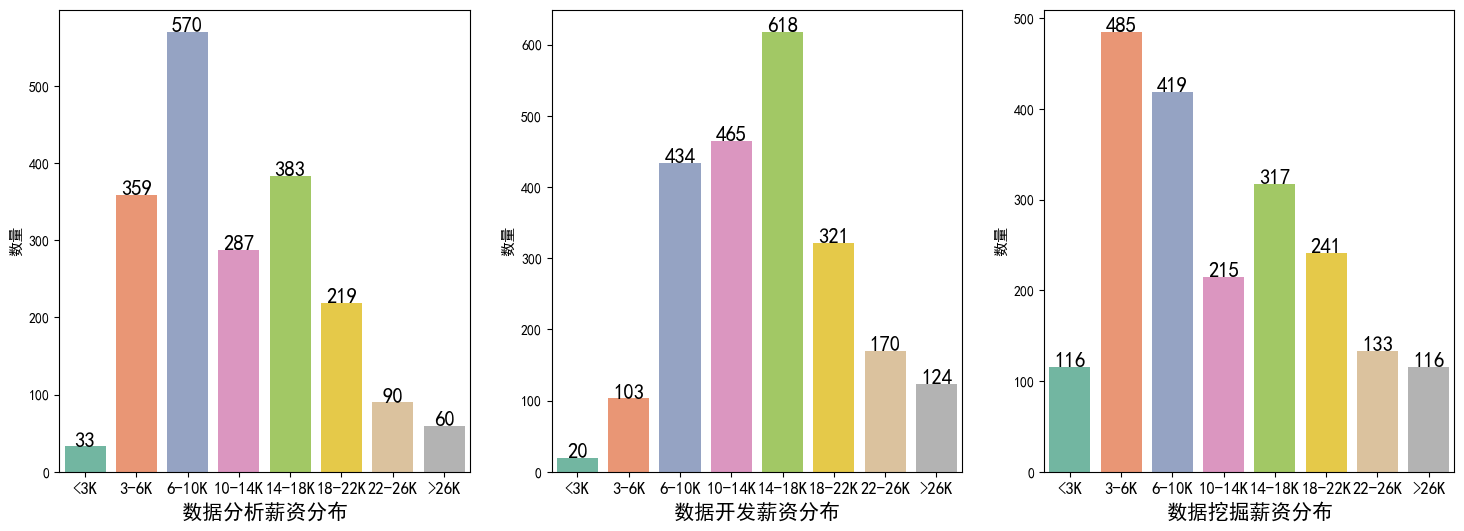

In [9]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x=dataAna['薪资'],palette='Set2')
for i in range(len(labels)):
    plt.text(range(15)[i],
            dataAna["薪资"].value_counts(sort=False)[i],
            dataAna["薪资"].value_counts(sort=False)[i], 
            ha='center',
            fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("数据分析薪资分布", fontsize=15)
plt.ylabel("数量", fontsize=11)
# 数据开发
plt.subplot(1,3,2)
sns.countplot(x=dataDev['薪资'],palette='Set2')
for i in range(len(labels)):
    plt.text(range(15)[i],
            dataDev["薪资"].value_counts(sort=False)[i],
            dataDev["薪资"].value_counts(sort=False)[i], 
            ha='center',
            fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("数据开发薪资分布", fontsize=15)
plt.ylabel("数量", fontsize=11)

# 数据挖掘
plt.subplot(1,3,3)
sns.countplot(x=dataMin['薪资'],palette='Set2')
for i in range(len(labels)):
    plt.text(range(15)[i],
            dataMin["薪资"].value_counts(sort=False)[i],
            dataMin["薪资"].value_counts(sort=False)[i], 
            ha='center',
            fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("数据挖掘薪资分布", fontsize=15)
plt.ylabel("数量", fontsize=11)


Text(0, 0.5, '数量')

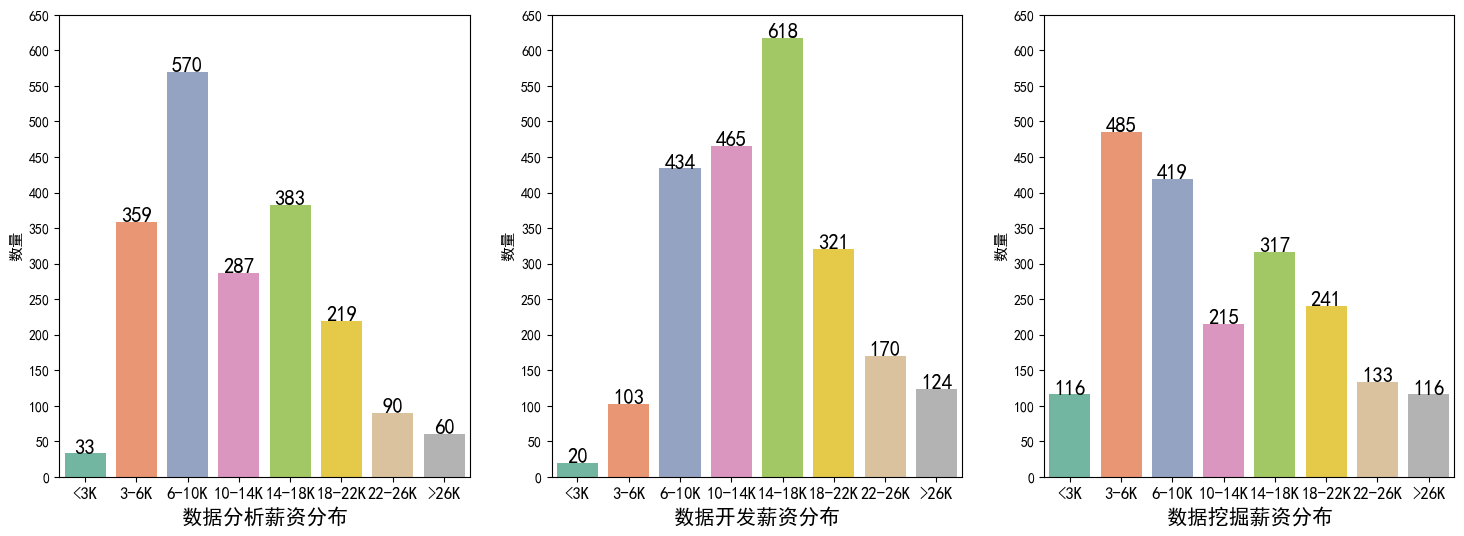

In [10]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x=dataAna['薪资'],palette='Set2')
for i in range(len(labels)):
    plt.text(range(15)[i],
            dataAna["薪资"].value_counts(sort=False)[i],
            dataAna["薪资"].value_counts(sort=False)[i], 
            ha='center',
            fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(range(0, 700, 50))
plt.xlabel("数据分析薪资分布", fontsize=15)
plt.ylabel("数量", fontsize=11)
# 数据开发
plt.subplot(1,3,2)
sns.countplot(x=dataDev['薪资'],palette='Set2')
for i in range(len(labels)):
    plt.text(range(15)[i],
            dataDev["薪资"].value_counts(sort=False)[i],
            dataDev["薪资"].value_counts(sort=False)[i], 
            ha='center',
            fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(range(0, 700, 50))
plt.xlabel("数据开发薪资分布", fontsize=15)
plt.ylabel("数量", fontsize=11)

# 数据挖掘
plt.subplot(1,3,3)
sns.countplot(x=dataMin['薪资'],palette='Set2')
for i in range(len(labels)):
    plt.text(range(15)[i],
            dataMin["薪资"].value_counts(sort=False)[i],
            dataMin["薪资"].value_counts(sort=False)[i], 
            ha='center',
            fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(range(0, 700, 50))
plt.xlabel("数据挖掘薪资分布", fontsize=15)
plt.ylabel("数量", fontsize=11)

Text(0.5, 0, '数据挖掘')

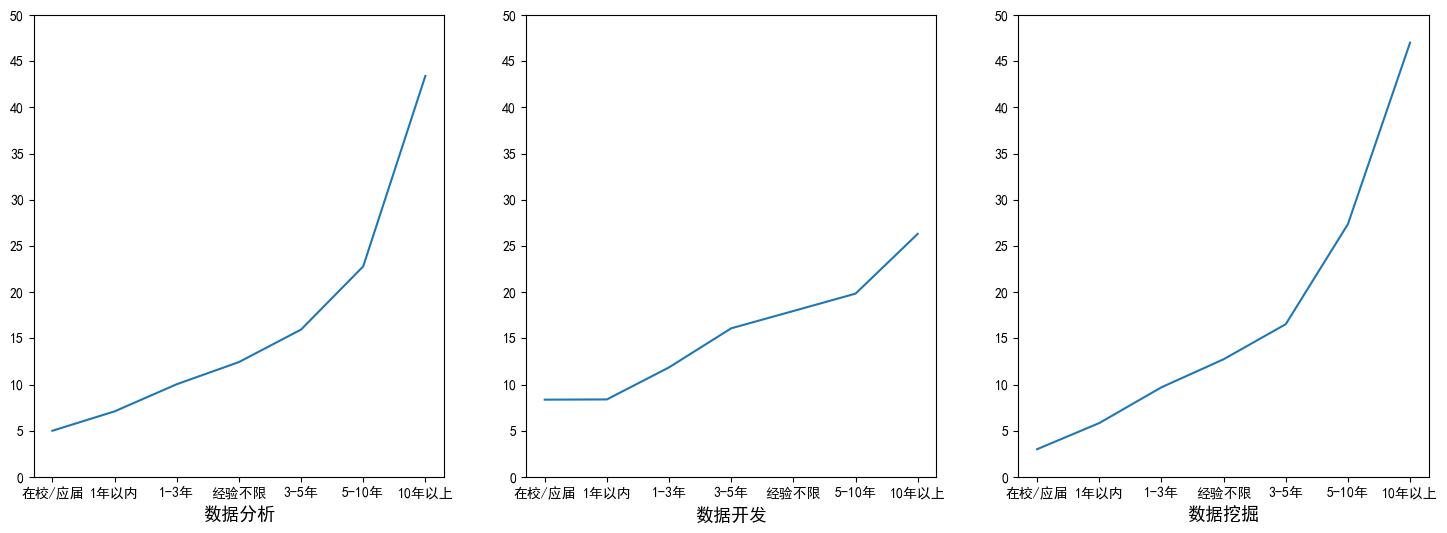

In [11]:
plt.figure(figsize=(18,6))
plt.tight_layout()
plt.subplot(1,3,1)

dfTem = dataAna[["工资", "经验要求"]].groupby(["经验要求"]).mean()
dfTem = dfTem.sort_values("工资") # 注释这行数据，可以让数据不按照薪资排列
dfTem = dfTem.reset_index()
plt.plot(np.array(dfTem['经验要求']), np.array(dfTem['工资']))
# plt.plot(dfTem.index, dfTem["工资"])
plt.yticks(range(0, 55, 5))
plt.xlabel("数据分析",fontsize=13)

plt.subplot(1,3,2)
dfTem = dataDev[["工资", "经验要求"]].groupby(["经验要求"]).mean()
dfTem = dfTem.sort_values("工资") # 注释这行数据，可以让数据不按照薪资排列
dfTem = dfTem.reset_index()
plt.plot(np.array(dfTem['经验要求']), np.array(dfTem['工资']))
# plt.plot(dfTem.index, dfTem["工资"])
plt.yticks(range(0, 55, 5))
plt.xlabel("数据开发",fontsize=13)

plt.subplot(1,3,3)
dfTem = dataMin[["工资", "经验要求"]].groupby(["经验要求"]).mean()
dfTem = dfTem.sort_values("工资") # 注释这行数据，可以让数据不按照薪资排列
dfTem = dfTem.reset_index()
plt.plot(np.array(dfTem['经验要求']), np.array(dfTem['工资']))
# plt.plot(dfTem.index, dfTem["工资"])
plt.yticks(range(0, 55, 5))
plt.xlabel("数据挖掘",fontsize=13)

Text(0.5, 0, '数据挖掘')

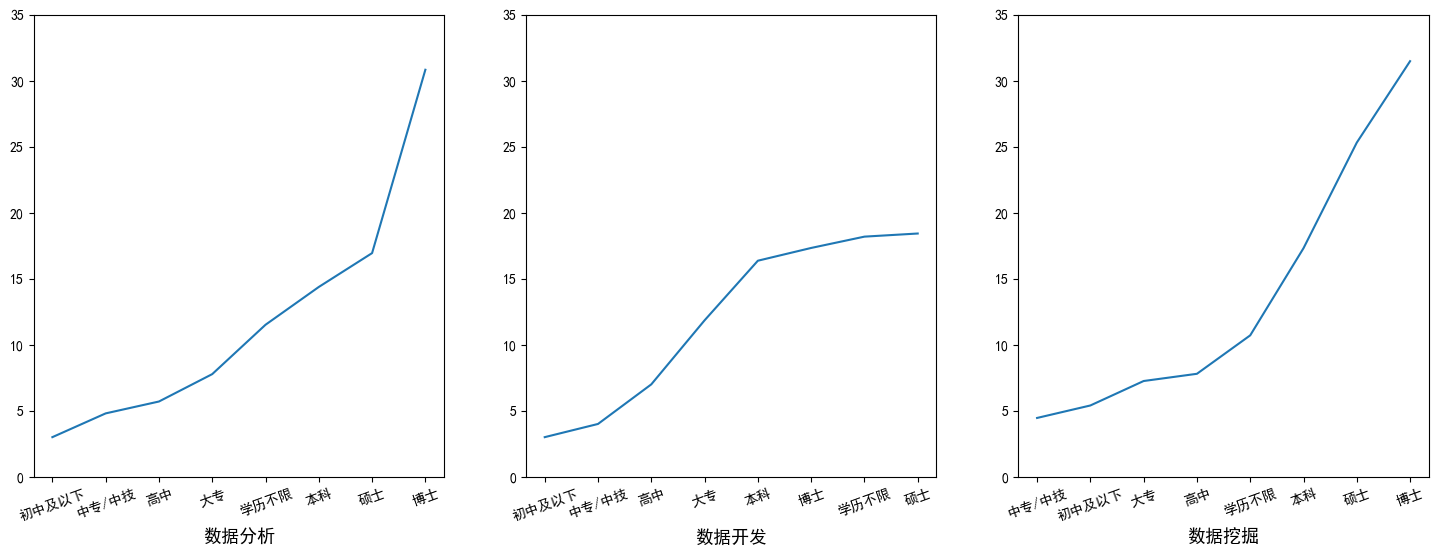

In [12]:
plt.figure(figsize=(18,6), facecolor='white')
plt.subplot(1,3,1)
dfTem = dataAna[["工资", "学历要求"]].groupby(["学历要求"]).mean()
dfTem = dfTem.sort_values("工资") # 注释这行数据，可以让数据不按照薪资排列
dfTem = dfTem.reset_index()
plt.plot(np.array(dfTem['学历要求']), np.array(dfTem['工资']))
plt.ylim(0, 35)
plt.xticks(rotation=20)
plt.xlabel("数据分析", fontsize=13)

plt.subplot(1,3,2)
dfTem = dataDev[["工资", "学历要求"]].groupby(["学历要求"]).mean()
dfTem = dfTem.sort_values("工资") # 注释这行数据，可以让数据不按照薪资排列
dfTem = dfTem.reset_index()
plt.plot(np.array(dfTem['学历要求']), np.array(dfTem['工资']))
plt.ylim(0, 35)
plt.xticks(rotation=20)
plt.xlabel("数据开发", fontsize=13)

plt.subplot(1,3,3)
dfTem = dataMin[["工资", "学历要求"]].groupby(["学历要求"]).mean()
dfTem = dfTem.sort_values("工资") # 注释这行数据，可以让数据不按照薪资排列
dfTem = dfTem.reset_index()
plt.plot(np.array(dfTem['学历要求']), np.array(dfTem['工资']))
plt.ylim(0, 35)
plt.xticks(rotation=20)
plt.xlabel("数据挖掘", fontsize=13)

In [13]:
# 整合3张csv表的数据到一个pd.DataFrame里面,并取出特定需要的列
df_1 = dataAna.copy()
df_2 = dataDev.copy()
df_3 = dataMin.copy()
df_1[["岗位名称"]] = "数据分析"
df_2[["岗位名称"]] = "数据开发"
df_3[["岗位名称"]] = "数据挖掘"
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df[["岗位名称", "薪资", "经验要求", "学历要求", "岗位描述", "公司人数"]]
# 用"未注明"填补空值
df[["公司人数"]] = df[["公司人数"]].fillna("未注明")

In [14]:
# df[["学历要求"]].value_counts()
# 过滤学历要求过低以及未标明学历要求的数据
fil = ["学历不限", "高中","中专/中技", "初中及以下"]
for f in fil:
    df.drop(df[df["学历要求"]==f].index, inplace=True)
df[["学历要求"]].value_counts()

学历要求
本科      4778
大专      1086
硕士       346
博士        38
dtype: int64

In [15]:
df[["薪资"]] = df[["薪资"]].fillna(method='ffill')
# df[["薪资"]].isna().sum()

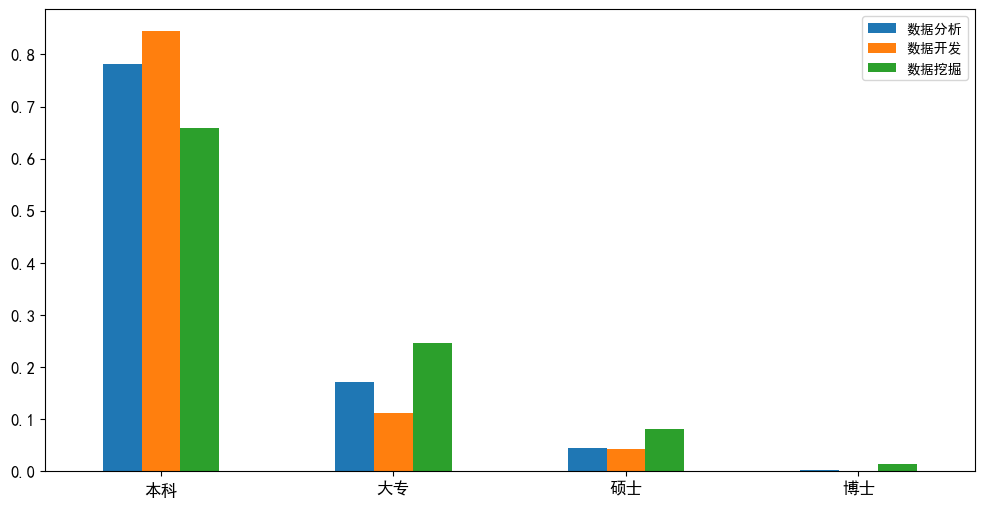

In [16]:
df_ana = df[df["岗位名称"]=="数据分析"]
df_dev = df[df["岗位名称"]=="数据开发"]
df_min = df[df["岗位名称"]=="数据挖掘"]
dic = { "数据分析": [],
        "数据开发": [],
        "数据挖掘": []}
education = ["本科", "大专", "硕士", "博士"]

S_ana = df_ana[["学历要求"]].value_counts().sum()
S_dev = df_dev[["学历要求"]].value_counts().sum()
S_min = df_min[["学历要求"]].value_counts().sum()

for i, j, job in ((df_ana,S_ana, "数据分析"), (df_dev,S_dev, "数据开发"),(df_min, S_min, "数据挖掘")):
    for k in education:
        v = len(i[i["学历要求"]==k])/j
        dic[job].append(v)
        
education_distribution = pd.DataFrame(dic, index=education)
ax = education_distribution.plot(kind="bar", rot=0, figsize=(12,6), fontsize=12)

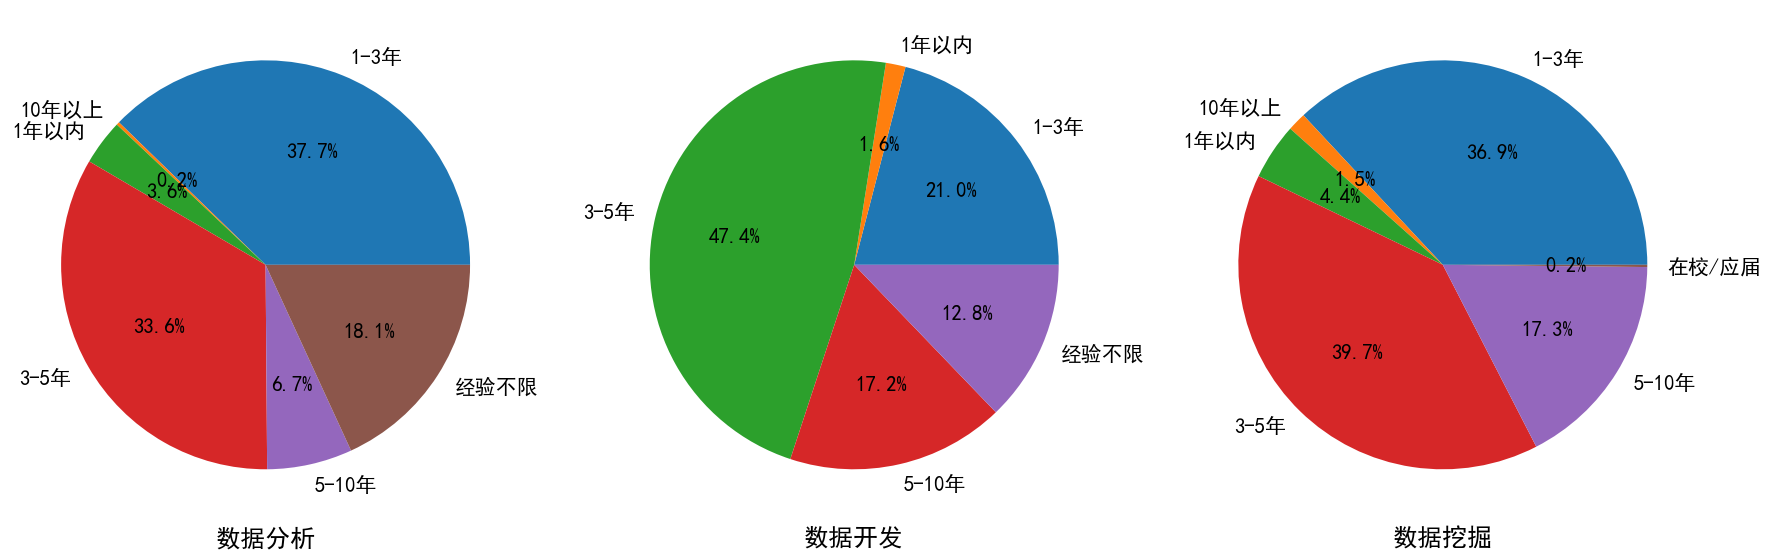

In [17]:
dataA = dataAna.drop(dataAna[dataAna["经验要求"]=="在校/应届"].index)
dataD = dataDev.drop(dataDev[dataDev["经验要求"]=='在校/应届'].index)
dataD.drop(dataD[dataD['经验要求']=="10年以上"].index, inplace=True)
dataM = dataMin.drop(dataMin[dataMin['经验要求']=='经验不限'].index)
# 剔除占比过少的数据，让饼图更美观

plt.figure(figsize=(18,9),facecolor="white")
plt.subplot(1,3,1)
labels = []
for i in dataA[['经验要求']].value_counts(sort=False).index.values:
        labels.append(i[0])

plt.pie(dataA[["经验要求"]].value_counts(sort=False),
        labels=labels,
        autopct="%0.1f%%",
        textprops={"fontsize":15})
plt.xlabel("数据分析", fontsize=18)


plt.subplot(1,3,2)
labels = []
for i in dataD[['经验要求']].value_counts(sort=False).index.values:
        labels.append(i[0])

plt.pie(dataD[["经验要求"]].value_counts(sort=False),
        labels=labels,
        autopct="%0.1f%%",
        textprops={"fontsize":15})
plt.xlabel("数据开发", fontsize=18)

plt.subplot(1,3,3)
labels = []
for i in dataM[['经验要求']].value_counts(sort=False).index.values:
        labels.append(i[0])
plt.pie(dataM[["经验要求"]].value_counts(sort=False),
        labels=labels,
        autopct="%0.1f%%",
        textprops={"fontsize":15})
plt.xlabel("数据挖掘", fontsize=18)
plt.tight_layout()
plt.show()

In [18]:
df_temp = pd.DataFrame(df_1[['公司人数']].value_counts())
df_temp.columns=['公司数量']
df_temp

,公司数量
公司人数,
100-499人,487
20-99人,479
1000-9999人,325
10000人以上,208
500-999人,173
0-20人,140


Text(0.5, 0, '数据挖掘')

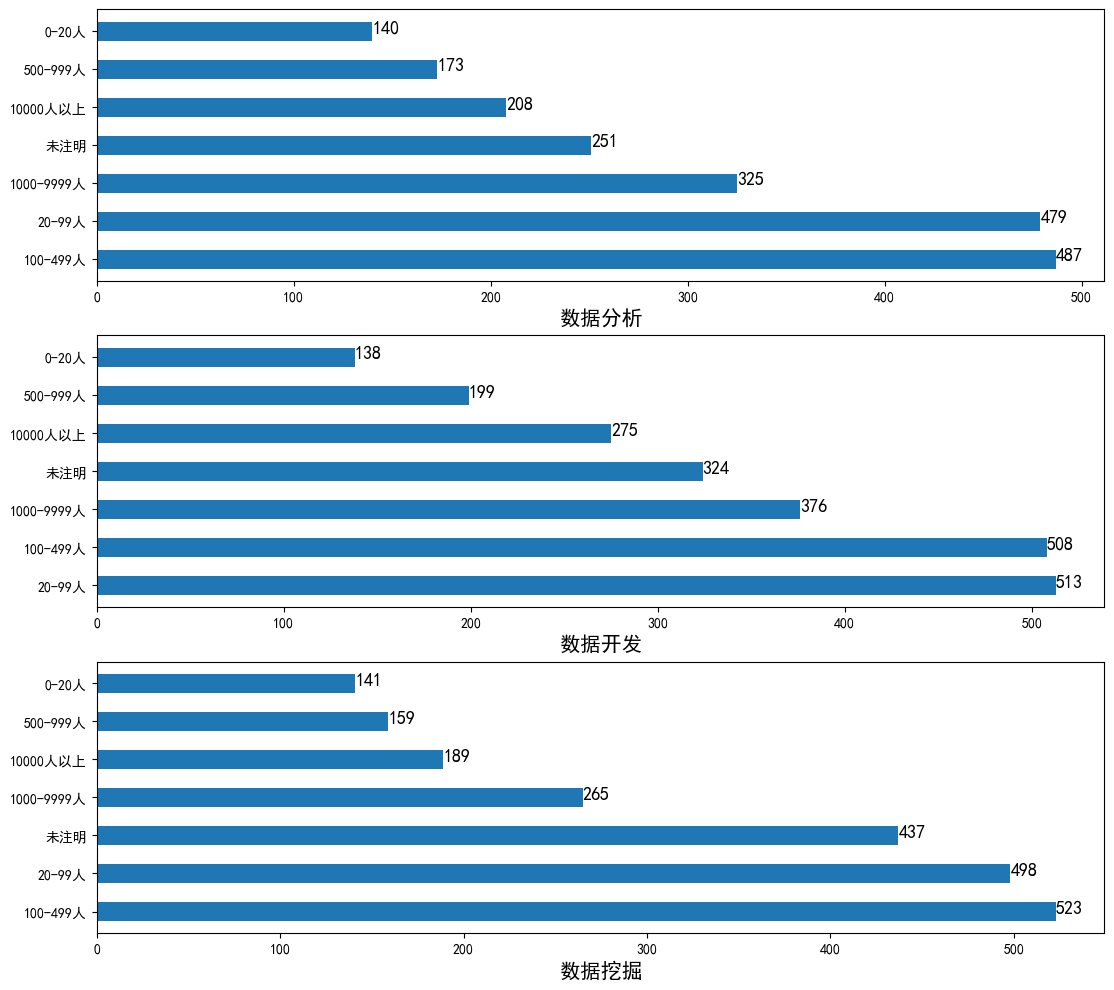

In [19]:
df_1[["公司人数"]] = df_1[["公司人数"]].fillna("未注明")
df_2[["公司人数"]] = df_2[["公司人数"]].fillna("未注明")
df_3[["公司人数"]] = df_3[["公司人数"]].fillna("未注明")

plt.figure(figsize=(13, 12), facecolor='white')

plt.subplot(3,1,1)

df_temp = pd.DataFrame(df_1[["公司人数"]].value_counts())
df_temp.columns=['公司数量']
df_temp = df_temp.reset_index()
plt.barh(df_temp["公司人数"], df_temp['公司数量'],height=0.5)
for i in range(7):
    plt.text(df_1[["公司人数"]].value_counts()[i], i-0.04, df_1[["公司人数"]].value_counts().values[i], fontsize=13)
plt.xlabel('数据分析', fontsize=15)

plt.subplot(3,1,2)
df_temp = pd.DataFrame(df_2[["公司人数"]].value_counts())
df_temp.columns=['公司数量']
df_temp = df_temp.reset_index()
plt.barh(df_temp["公司人数"], df_temp['公司数量'],height=0.5)
for i in range(7):
    plt.text(df_2[["公司人数"]].value_counts()[i], i-0.04, df_2[["公司人数"]].value_counts().values[i], fontsize=13)
plt.xlabel('数据开发', fontsize=15)

plt.subplot(3,1,3)

df_temp = pd.DataFrame(df_3[["公司人数"]].value_counts())
df_temp.columns=['公司数量']
df_temp = df_temp.reset_index()
plt.barh(df_temp["公司人数"], df_temp['公司数量'],height=0.5)
for i in range(7):
    plt.text(df_3[["公司人数"]].value_counts()[i], i-0.04, df_3[["公司人数"]].value_counts().values[i], fontsize=13)
plt.xlabel('数据挖掘', fontsize=15)

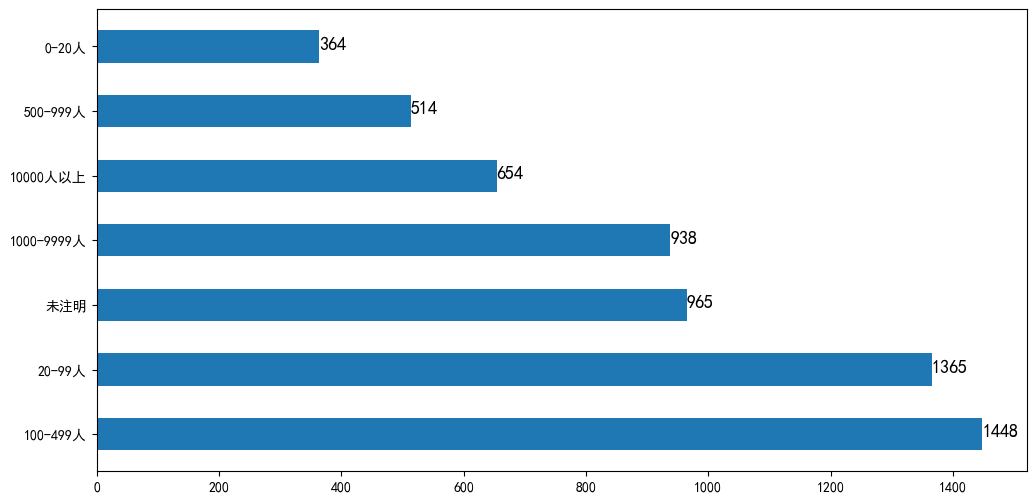

In [20]:
# pd.DataFrame(df[["公司人数"]].value_counts()).plot(kind="bar",rot="horizontal")
# df_temp = pd.DataFrame(df[["公司人数"]].value_counts(), columns=["公司数量"])
# df[["公司人数"]].value_counts().index.values
plt.figure(figsize=(12,6))
# plt.barh(range(6), np.array(df[["公司人数"]].value_counts().values))

df_temp = pd.DataFrame(df[["公司人数"]].value_counts())
df_temp.columns=['公司数量']
# df_temp[["公司规模"]] = np.NaN
# for i in range(len(df_temp)):
#     df_temp.iloc[i,1] = df_temp.index.values[i][0]
df_temp = df_temp.reset_index()
plt.barh(df_temp["公司人数"], df_temp['公司数量'],height=0.5)
for i in range(7):
    plt.text(df[["公司人数"]].value_counts()[i], i-0.04, df[["公司人数"]].value_counts().values[i], fontsize=13)


In [21]:
''' 
数据中没有明确的专业要求一栏,在岗位描述中才能找到有关于专业需求,因此对岗位描述进行文本处理,将不同专业对应的关键词提取出,
当岗位描述中出现了关键词,那么对应其所属的专业数量加一.最后计算各个专业占比,得到对应结果.
''' 

dic = {}
for i in df["岗位描述"]:
    s = str(i).lower()
    s = s.replace('/', ' ')
    ls = s.split(' ')
    for j in ls:
        if j in dic.keys():
            dic[j]+=1
        else:
            dic[j] = 1
dic_2 = dic.copy()
for i in dic.keys():
    if dic[i]<50:
        del dic_2[i]
    else:
        continue

# ls = sorted(dic.values(),reverse=True)
# cnt = 0
# for i in ls:
#     if i>50:
#         cnt += 1
#     else:
#         continue
# cnt

In [22]:
dic = {"数据分析":[0, 0, 0, 0], "数据开发":[0, 0, 0, 0], "数据挖掘":[0, 0, 0, 0]}

# 关键词筛选,客户可以在此增删每个专业对应的关键词,这里关键词的不同会对结果有较大的影响

computer = ['python', '计算机相关专业', '数据分析', '挖掘经验', 'sql', 'pandas', 'r', '机器学习建模经验', '决策树', 'java',
            "mysql", 'hadoop', 'oracle', 'hive', 'kettle', '大数据', '数据仓库', 'spark', '数据开发', 'etl', 'hdfs',
            'linux', '机器学习算法', '数据建模', 'hbase', 'kafka','机器学习', '数据处理', 'shell', 'storm', '分布式技术', 'scala', 
            'c++', 'flink', '深度学习算法']

statistic = ['python', 'power', 'bi', 'spss', "统计相关专业", '数据分析', 'excel', 'pandas', 'r', 
            'tableau', 'sas', '回归分析', '决策树', 'matlab', '相关分析', '数据建模', '数据处理', '数据治理', '统计','机器学习',]

math = ['bi','r', 'spss', "数学", 'excel', 'tableau', 'sas', '回归分析', 'matlab', '相关分析', '数学相关专业', '机器学习算法','机器学习','统计相关专业',
        '深度学习算法', "数据建模", '相关分析', ]

other = ['电商', "零售行业数据相关经验", '经济', '工商管理相关专业', '商业分析', '金融行业数据相关经验', '风控相关经验', '金融',
        '业务数据分析', '商业分析经验', '用户画像', '文娱', '游戏行业数据相关经验','数据采集', '图片标注', '文本标注', '产品设计',
        '业务数据分析', '银行']

for i in df_1['岗位描述']:
    s = str(i).lower()
    s = s.replace('/', ' ')
    ls = s.split(' ')
    for j in ls:
        if j in computer:
            dic["数据分析"][0] += 1
        elif j in statistic:
            dic["数据分析"][1] += 1
        elif j in math:
            dic["数据分析"][2] += 1
        elif j in other:
            dic["数据分析"][3] += 1
        else:
            continue

for i in df_2['岗位描述']:
    s = str(i).lower()
    s = s.replace('/', ' ')
    ls = s.split(' ')
    for j in ls:
        if j in computer:
            dic["数据开发"][0] += 1
        elif j in statistic:
            dic["数据开发"][1] += 1
        elif j in math:
            dic["数据开发"][2] += 1
        elif j in other:
            dic["数据开发"][3] += 1
        else:
            continue
            


for i in df_3['岗位描述']:
    s = str(i).lower()
    s = s.replace('/', ' ')
    ls = s.split(' ')
    for j in ls:
        if j in computer:
            dic["数据挖掘"][0] += 1
        elif j in statistic:
            dic["数据挖掘"][1] += 1
        elif j in math:
            dic["数据挖掘"][2] += 1
        elif j in other:
            dic["数据挖掘"][3] += 1
        else:
            continue

dic_3 = {"数据分析":[], "数据开发":[], "数据挖掘":[]  }
for i in dic.keys():
    S = sum(dic[i])
    for j in range(4):
        div = dic[i][j]/S

        dic_3[i].append(div)
dic_3
df = pd.DataFrame(dic_3, index = ["计算机相关","统计学相关", "数学相关", "其他专业"])

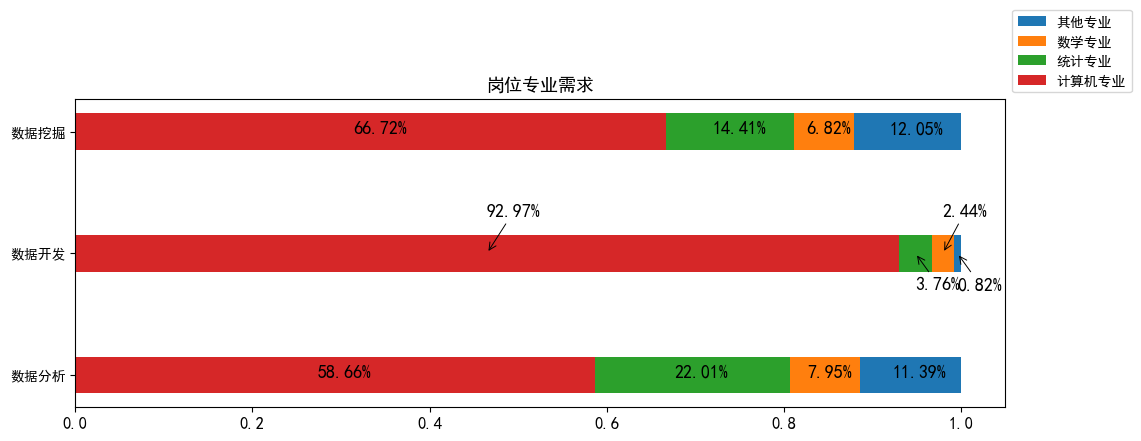

In [23]:
plt.figure(figsize=(12,4))

plt.barh(df.columns.values,df.loc["计算机相关", :]+df.loc['统计学相关',:]+df.loc['数学相关',:]+df.loc['其他专业', :],height = 0.3, label="其他专业")
plt.barh(df.columns.values,df.loc["计算机相关", :]+df.loc['统计学相关',:]+df.loc['数学相关',:],height = 0.3, label='数学专业')
plt.barh(df.columns.values,df.loc["计算机相关", :]+df.loc['统计学相关',:],height = 0.3, label='统计专业')
plt.barh(df.columns.values,df.loc["计算机相关", :], height = 0.3, label='计算机专业')
plt.legend(loc='lower left',bbox_to_anchor=(1, 1))
plt.xticks(fontsize=12)
plt.title("岗位专业需求", fontsize=13)

for i in [0,2]:
    x = 0
    for j in range(4):
        x += 0.5*df.iloc[j, i]
        plt.text(  
            x-0.02,
            i-0.02,
            "{:.2%}".format(df.iloc[j,i]),
            fontsize=13,
        )
        x += 0.5*df.iloc[j, i]

#数据开发的文字显示
x = 0
y = 0.3
for i in range(4): 
    plt.annotate(
        "{:.2%}".format(df.iloc[i,1]),
        xy = (x + 0.5*df.iloc[i,1], 1),
        xytext = (x + 0.5*df.iloc[i,1], 1+y),
        arrowprops = dict(arrowstyle = '->', facecolor='black', lw=0.7),
        fontsize=13
    )
    x += df.iloc[i,1]
    y *= -1

In [24]:
df

,数据分析,数据开发,数据挖掘
计算机相关,0.586563,0.929742,0.667189
统计学相关,0.220077,0.037633,0.144125
数学相关,0.079487,0.024431,0.068233
其他专业,0.113874,0.008194,0.120453
